# Data Loading


In [20]:
from google.colab import files
uploaded = files.upload()

Saving healthcare_dataset.csv to healthcare_dataset (2).csv


In [25]:
import pandas as pd
import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.shape
df.columns
df_copy = df.set_index('Patient_ID')
df_copy.shape
df_copy.head()

,Age,Gender,Height_m,Weight_kg,BMI,Blood_Pressure,Cholesterol_mg/dL,Diabetes,Smoking_Status,Exercise_Frequency,Glucose_Level_mg/dL,Heart_Rate_bpm,Blood_Oxygen_SpO2%,Hospital_Visits,Diagnosis,Treatment_Plan
Patient_ID,,,,,,,,,,,,,,,,
1,69,Female,1.58,102.5,41.1,High,221,0,Current Smoker,Moderate,182.2,78,86.1,1,Healthy,Medication
2,32,Female,1.74,59.1,19.5,Normal,184,0,Non-Smoker,Light,89.6,101,93.6,6,Healthy,Medication
3,89,Male,1.77,103.1,32.9,High,296,1,Non-Smoker,Light,180.7,76,97.8,0,Heart Disease,Lifestyle Change
4,78,Male,1.53,51.7,22.1,Normal,179,0,Non-Smoker,Active,198.9,104,95.9,1,Heart Disease,Medication
5,38,Male,1.67,51.5,18.5,Normal,227,1,Non-Smoker,Sedentary,164.5,72,90.4,7,Other,Lifestyle Change


In [26]:
# checking for missing values
df_copy.isna().any().any() # checks if there's any missing value in the entire dataframe
df_copy.isna().sum() # sums the amount of misssing values per column
df_copy.isna().sum().sum() # sums the amount of missing values in the dataframe


234

In [27]:
# getting summmary statistics
df_copy.describe()

,Age,Height_m,Weight_kg,BMI,Cholesterol_mg/dL,Diabetes,Glucose_Level_mg/dL,Heart_Rate_bpm,Blood_Oxygen_SpO2%,Hospital_Visits
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,52.930000,1.753800,84.904600,28.241000,224.018000,0.214000,132.910600,89.250000,92.195400,4.502000
std,21.009519,0.146916,20.270428,8.456709,43.221683,0.410538,37.962011,17.409126,4.280519,2.861883
min,18.000000,1.500000,50.300000,13.100000,150.000000,0.000000,70.000000,60.000000,85.100000,0.000000
25%,34.000000,1.620000,66.575000,21.750000,187.000000,0.000000,100.025000,75.000000,88.600000,2.000000
50%,52.000000,1.760000,84.900000,27.550000,222.000000,0.000000,131.300000,89.000000,92.100000,4.000000
75%,71.000000,1.880000,101.350000,33.900000,262.000000,0.000000,165.325000,104.000000,95.900000,7.000000
max,89.000000,2.000000,120.000000,51.700000,299.000000,1.000000,199.600000,119.000000,100.000000,9.000000


In [28]:
# Finding all patients with high BMI (> 30) and high cholesterol (> 240 mg/dL).
high_bmi_chol = df_copy[
    (df_copy['BMI'] > 30) & (df_copy['Cholesterol_mg/dL'] > 240)
    ]
high_bmi_chol.head()


,Age,Gender,Height_m,Weight_kg,BMI,Blood_Pressure,Cholesterol_mg/dL,Diabetes,Smoking_Status,Exercise_Frequency,Glucose_Level_mg/dL,Heart_Rate_bpm,Blood_Oxygen_SpO2%,Hospital_Visits,Diagnosis,Treatment_Plan
Patient_ID,,,,,,,,,,,,,,,,
3,89,Male,1.77,103.1,32.9,High,296,1,Non-Smoker,Light,180.7,76,97.8,0,Heart Disease,Lifestyle Change
7,20,Female,1.53,84.2,36.0,Normal,262,0,Non-Smoker,Light,199.3,86,88.0,1,Healthy,NaN
12,55,Male,1.84,119.8,35.4,Elevated,299,0,Non-Smoker,Moderate,145.6,65,97.7,8,Healthy,Medication
21,76,Female,1.56,95.8,39.4,High,273,0,Non-Smoker,Active,159.0,105,88.6,3,Other,Medication
25,79,Male,1.53,80.3,34.3,Normal,291,0,Non-Smoker,Moderate,86.4,110,98.1,6,Hypertension,Lifestyle Change


In [29]:
# Identify smokers who have been diagnosed with heart disease.
smokers_with_hd = df_copy.query("Smoking_Status == 'Current Smoker' and Diagnosis == 'Heart Disease'")
smokers_with_hd.head()
smokers_with_hd.shape

(21, 16)

In [32]:
# # List patients who are diabetic and have high blood pressure.
df_copy['Diabetes'] = df_copy['Diabetes'].astype(bool)
df_copy.head()
# List patients who are diabetic and have high blood pressure.
diabetics_with_highbp = df_copy.query("Diabetes == True and Blood_Pressure == 'High'")
diabetics_with_highbp.head()


,Age,Gender,Height_m,Weight_kg,BMI,Blood_Pressure,Cholesterol_mg/dL,Diabetes,Smoking_Status,Exercise_Frequency,Glucose_Level_mg/dL,Heart_Rate_bpm,Blood_Oxygen_SpO2%,Hospital_Visits,Diagnosis,Treatment_Plan
Patient_ID,,,,,,,,,,,,,,,,
3,89,Male,1.77,103.1,32.9,High,296,True,Non-Smoker,Light,180.7,76,97.8,0,Heart Disease,Lifestyle Change
38,21,Male,1.94,75.8,20.1,High,217,True,Non-Smoker,Moderate,142.1,98,92.5,9,Healthy,NaN
75,32,Female,1.56,104.6,43.0,High,242,True,Non-Smoker,Light,174.5,101,92.3,3,Other,NaN
118,60,Male,1.76,95.1,30.7,High,273,True,Non-Smoker,Sedentary,138.9,62,86.3,5,Healthy,NaN
167,36,Male,1.70,101.3,35.1,High,296,True,Non-Smoker,Sedentary,160.8,117,92.6,1,Healthy,Medication


In [37]:
# Retrieve all patients who have been hospitalized more than 5 time
over_5_visits = df_copy[df_copy["Hospital_Visits"] > 5]

In [38]:
# all female patients over the age of 50 who have diabetes and are smokers.
female_over_50 = df_copy.query("Gender == 'Female' and Age > 50 and Diabetes == True and Smoking_Status == 'Current Smoker'")
female_over_50.head()

,Age,Gender,Height_m,Weight_kg,BMI,Blood_Pressure,Cholesterol_mg/dL,Diabetes,Smoking_Status,Exercise_Frequency,Glucose_Level_mg/dL,Heart_Rate_bpm,Blood_Oxygen_SpO2%,Hospital_Visits,Diagnosis,Treatment_Plan
Patient_ID,,,,,,,,,,,,,,,,
14,81,Female,1.80,81.6,25.2,Normal,259,True,Current Smoker,Light,168.3,77,88.7,7,Healthy,NaN
102,82,Female,1.96,99.5,25.9,Normal,273,True,Current Smoker,Light,105.3,82,97.8,7,Hypertension,Surgery
236,85,Female,1.76,96.7,31.2,Elevated,168,True,Current Smoker,Light,71.9,83,87.6,2,Hypertension,Surgery
252,68,Female,1.80,97.8,30.2,Normal,218,True,Current Smoker,Light,71.6,82,97.8,5,Healthy,NaN
270,61,Female,1.65,78.5,28.8,Normal,273,True,Current Smoker,Light,103.6,60,90.6,4,Heart Disease,Medication


# Data Aggregation and Summarization

In [43]:
# Group patients by age range and calculate the average BMI for each group
age_bins = [0, 18, 35, 60, 80, 100]
age_labels =['Youth', 'Young Adult', 'Middle Aged', 'Senior', 'Elderly']

df_copy["Age_Group"] = pd.cut(df_copy["Age"], bins = age_bins, labels= age_labels, right = True)
average_bmi_by_age = df_copy.groupby("Age_Group").agg({"BMI":"mean"}).reset_index()
average_bmi_by_age.columns = ["Age_Group", "Average_BMI"]
average_bmi_by_age

<ipython-input-43-f9f16a8588d5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bmi_by_age = df_copy.groupby("Age_Group").agg({"BMI":"mean"}).reset_index()


,Age_Group,Average_BMI
0,Youth,31.070000
1,Young Adult,27.823967
2,Middle Aged,27.722024
3,Senior,29.375333
4,Elderly,27.049020


In [48]:
# Find the most common diagnosis among patients who exercise regularly.
df["Exercise_Frequency"].unique()
reg_execiser = df[df["Exercise_Frequency"] != "Sedentary"]
most_common_diagnosis = reg_execiser["Diagnosis"].value_counts().idxmax()
most_common_diagnosis


'Healthy'

In [49]:
# Count the number of patients in each blood pressure category.
df_copy["Blood_Pressure"].value_counts()

,count
Blood_Pressure,
Normal,291
Elevated,142
High,67


In [51]:
# Find the average cholesterol level by smoking status
avg_chol_by_smoking = df_copy.groupby("Smoking_Status").agg({"Cholesterol_mg/dL":"mean"}).reset_index()
avg_chol_by_smoking.columns = ["Smoking_Status", "Average_Cholesterol"]
avg_chol_by_smoking

,Smoking_Status,Average_Cholesterol
0,Current Smoker,225.192308
1,Former Smoker,227.528302
2,Non-Smoker,222.313793


In [56]:
# Determine the percentage of patients with diabetes in each exercise category.
diabetics = df_copy[df_copy["Diabetes"] == True]
percentage_exercising_diabetics = diabetics.groupby("Exercise_Frequency").agg({"Diabetes":"count"}).reset_index()
percentage_exercising_diabetics["Percentage Diabetics"] = percentage_exercising_diabetics["Diabetes"] / percentage_exercising_diabetics["Diabetes"].sum() * 100
percentage_exercising_diabetics.columns = ["Exercise_Frequency", "Count", "Percentage Diabetics"]
percentage_exercising_diabetics["Percentage Diabetics"] = percentage_exercising_diabetics["Percentage Diabetics"].round(2)
percentage_exercising_diabetics

,Exercise_Frequency,Count,Percentage Diabetics
0,Active,11,10.28
1,Light,35,32.71
2,Moderate,24,22.43
3,Sedentary,37,34.58


# Merging and Joining Data

In [58]:
from google.colab import files
uploaded = files.upload()

Saving patient_medication_history (1).csv to patient_medication_history (1).csv


In [59]:
import pandas as pd
meds_df = pd.read_csv('patient_medication_history (1).csv')
meds_df.head()

,Patient_ID,Medication,Dosage,Start_Date
0,1,Lisinopril,40mg,2021-09-25
1,2,Lisinopril,10mg,2021-12-07
2,3,Atorvastatin,50mcg,2021-09-06
3,4,Metformin,100mg,2024-11-02
4,5,Lisinopril,150mg,2020-08-22


In [62]:
# Perform an inner join to link patients with their medications.
meds_df["Start_Date"] = pd.to_datetime(meds_df["Start_Date"])
merged_df = pd.merge(df_copy, meds_df,
                     left_index=True, right_on="Patient_ID",
                     how="inner"
                     )
merged_df.head()

,Age,Gender,Height_m,Weight_kg,BMI,Blood_Pressure,Cholesterol_mg/dL,Diabetes,Smoking_Status,Exercise_Frequency,...,Heart_Rate_bpm,Blood_Oxygen_SpO2%,Hospital_Visits,Diagnosis,Treatment_Plan,Age_Group,Patient_ID,Medication,Dosage,Start_Date
0,69,Female,1.58,102.5,41.1,High,221,False,Current Smoker,Moderate,...,78,86.1,1,Healthy,Medication,Senior,1,Lisinopril,40mg,2021-09-25
1,32,Female,1.74,59.1,19.5,Normal,184,False,Non-Smoker,Light,...,101,93.6,6,Healthy,Medication,Young Adult,2,Lisinopril,10mg,2021-12-07
2,89,Male,1.77,103.1,32.9,High,296,True,Non-Smoker,Light,...,76,97.8,0,Heart Disease,Lifestyle Change,Elderly,3,Atorvastatin,50mcg,2021-09-06
3,78,Male,1.53,51.7,22.1,Normal,179,False,Non-Smoker,Active,...,104,95.9,1,Heart Disease,Medication,Senior,4,Metformin,100mg,2024-11-02
4,38,Male,1.67,51.5,18.5,Normal,227,True,Non-Smoker,Sedentary,...,72,90.4,7,Other,Lifestyle Change,Middle Aged,5,Lisinopril,150mg,2020-08-22


In [68]:
# Use a left join to ensure all patients remain in the dataset, even if they don’t take medications.
merged_df_left = pd.merge(
    df_copy, meds_df, left_index=True,
    right_on="Patient_ID", how="left"
    )
merged_df_left.head(2)

,Age,Gender,Height_m,Weight_kg,BMI,Blood_Pressure,Cholesterol_mg/dL,Diabetes,Smoking_Status,Exercise_Frequency,...,Heart_Rate_bpm,Blood_Oxygen_SpO2%,Hospital_Visits,Diagnosis,Treatment_Plan,Age_Group,Patient_ID,Medication,Dosage,Start_Date
0,69,Female,1.58,102.5,41.1,High,221,False,Current Smoker,Moderate,...,78,86.1,1,Healthy,Medication,Senior,1,Lisinopril,40mg,2021-09-25
1,32,Female,1.74,59.1,19.5,Normal,184,False,Non-Smoker,Light,...,101,93.6,6,Healthy,Medication,Young Adult,2,Lisinopril,10mg,2021-12-07


# Data Visualization

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

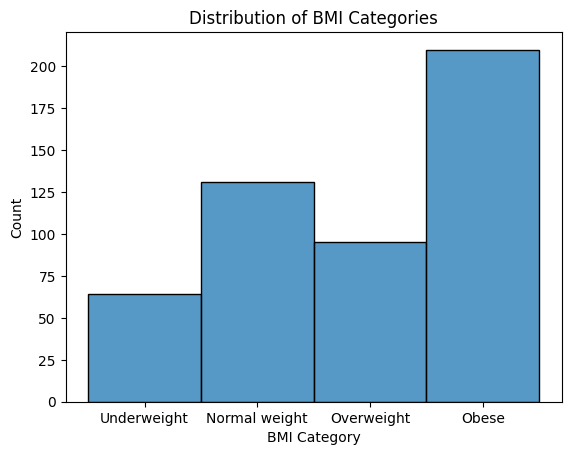

In [73]:
# Define the bin edges for BMI categories
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]

# Define the labels for each BMI category
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
df_copy["BMI_Category"] = pd.cut(df_copy["BMI"], bins = bmi_bins,
                                 labels= bmi_labels, right = False
                                 )

sns.histplot(x = 'BMI_Category', data = df_copy)
plt.title("Distribution of BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()

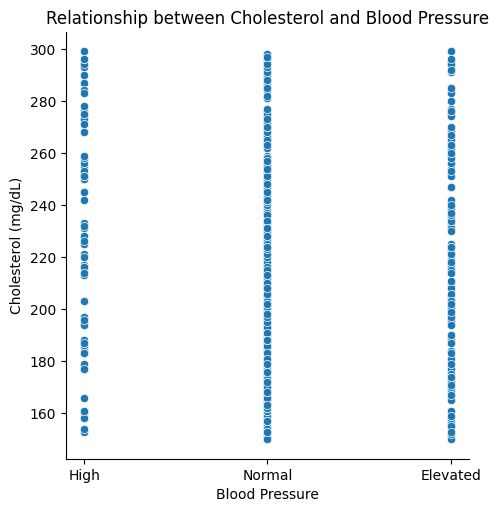

In [76]:
# Create a scatter plot to show the relationship between cholesterol and blood pressure.
sns.relplot(x = 'Blood_Pressure', y = 'Cholesterol_mg/dL',
            data = df_copy, kind = 'scatter'
            )
plt.title("Relationship between Cholesterol and Blood Pressure")
plt.xlabel("Blood Pressure")
plt.ylabel("Cholesterol (mg/dL)")
plt.show()

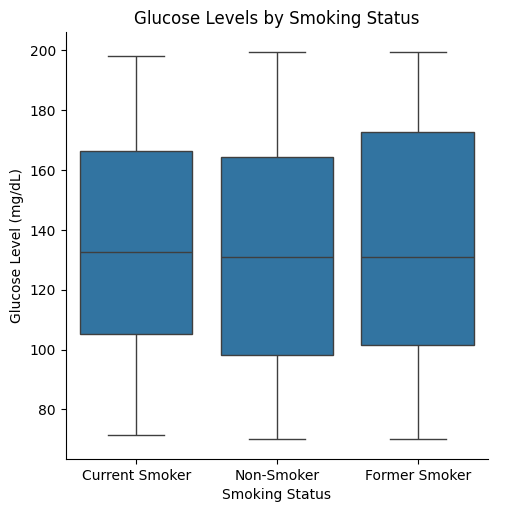

In [77]:
sns.catplot(data = df_copy, x = 'Smoking_Status', y = 'Glucose_Level_mg/dL', kind = 'box')
plt.title("Glucose Levels by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()